In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.color_palette('viridis')

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [3]:
blue = sns.color_palette('viridis')[1]
green = sns.color_palette('viridis')[4]
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [73]:
df.dtypes # Default data types assigned to the columns

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added             float64
month_added            float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
df.duplicated(subset='title').sum() # No duplicate records

0

In [11]:
df['date_added'] = pd.to_datetime(df['date_added']) # converting the 'date_added' column to datetype

In [12]:
df['year_added'] = df['date_added'].dt.year # getting the 'year' from the 'date_added' column
df['month_added'] = df['date_added'].dt.month # getting the 'month' from the 'date_added' column

In [13]:
df = df.drop(columns='show_id') # dropping the 'show_id' column

In [14]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,1.0


### Count of TV shows vs Movies on Netflix

In [15]:
tv_vs_movies_count = df['type'].value_counts()
tv_vs_movies_count

Movie      5377
TV Show    2410
Name: type, dtype: int64

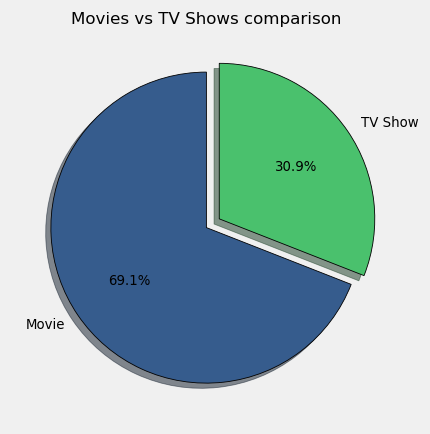

In [16]:
plt.figure(figsize=(4,4), dpi=120)
plt.pie(tv_vs_movies_count.values, labels=tv_vs_movies_count.index, 
        shadow=True, 
        autopct='%1.1f%%', 
        wedgeprops={'edgecolor':'black'},
        explode=[0,0.1],
        colors=[blue, green],
        startangle=90,
        textprops={'fontsize': 8}
       )
plt.title('Movies vs TV Shows comparison', fontsize=10);

### Most number of directions

In [17]:
most_directions = df.loc[df['director'].notnull(), 'director'].value_counts().head(10)
most_directions

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: director, dtype: int64

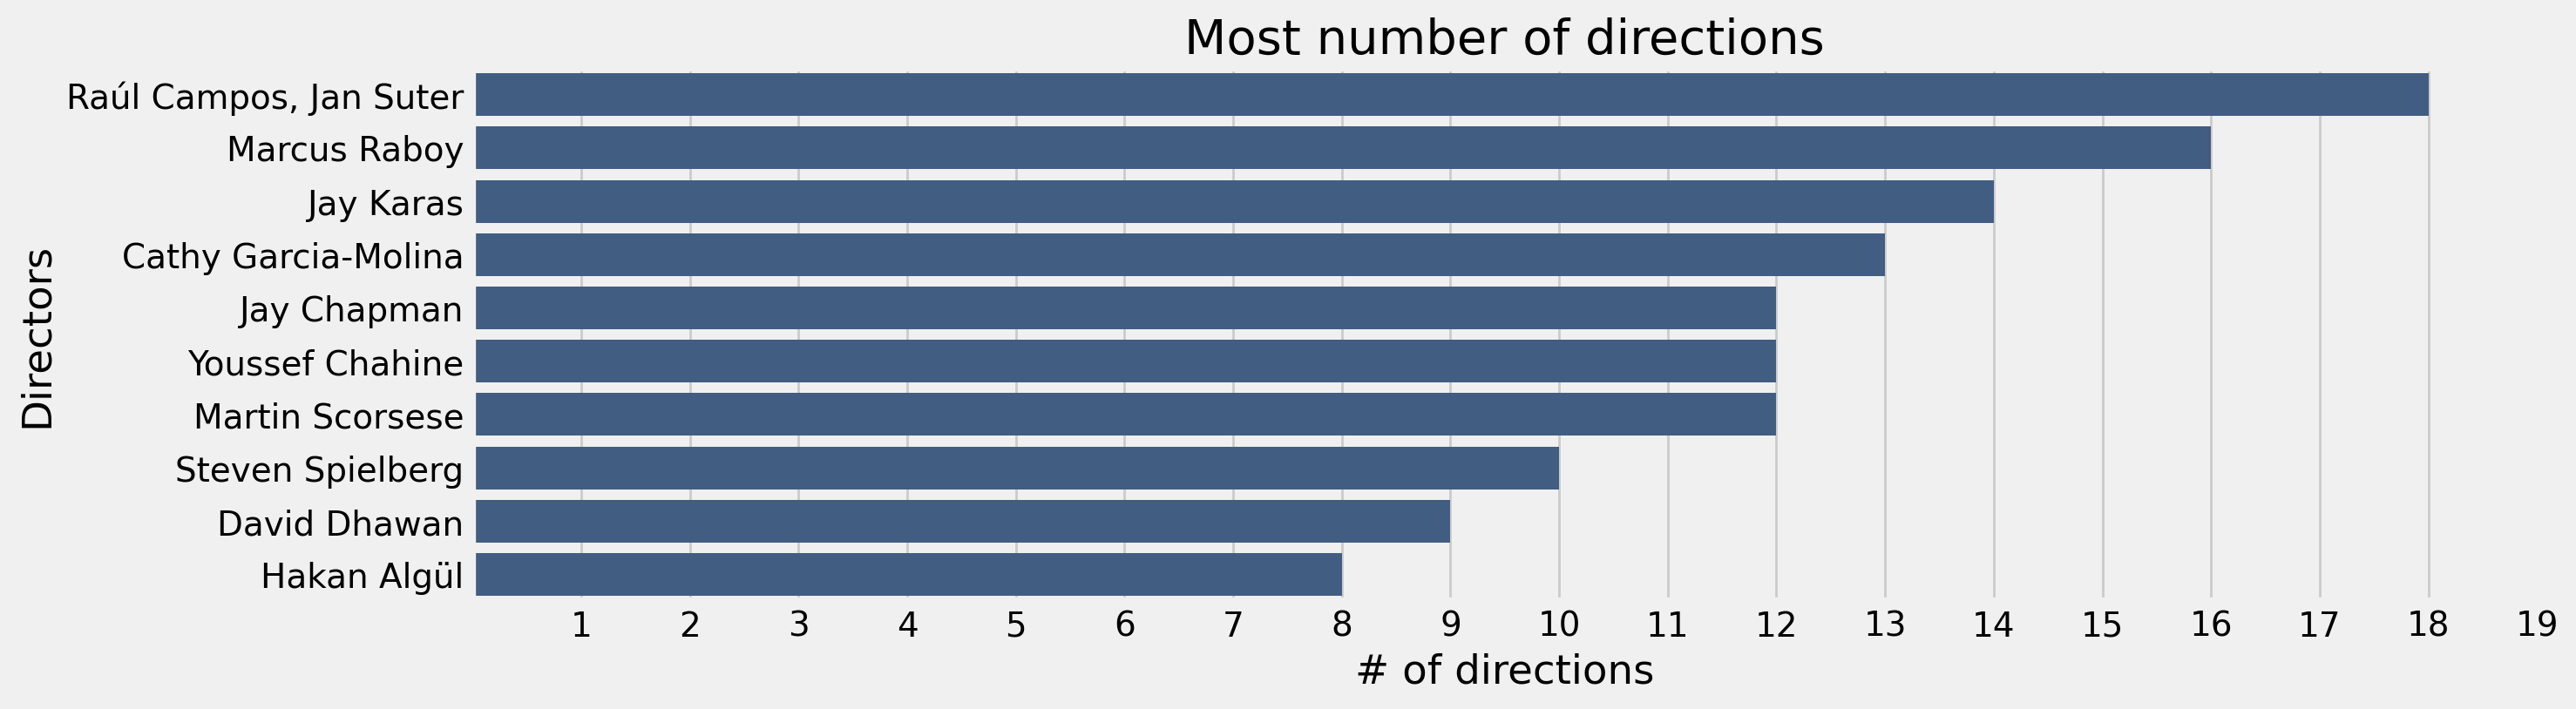

In [18]:
sns.barplot(x=most_directions.values, y=most_directions.index, color=blue)
plt.xticks(np.arange(1,20,1))
plt.xlabel('# of directions')
plt.ylabel('Directors')
plt.tight_layout()
plt.title('Most number of directions');

### Most content per country

In [19]:
# For a lot of the records the country column contains multiple values as shown below

In [20]:
df.loc[(df['country'].notnull()) & (df['country'].str.contains(','))].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
11,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018.0,11.0
17,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018-10-10,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ...",2018.0,10.0
48,Movie,10 Days in Sun City,Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...","South Africa, Nigeria",2019-10-18,2017,TV-14,87 min,"Comedies, International Movies, Romantic Movies",After his girlfriend wins the Miss Nigeria pag...,2019.0,10.0
50,Movie,"10,000 B.C.",Roland Emmerich,"Steven Strait, Camilla Belle, Cliff Curtis, Jo...","United States, South Africa",2019-06-01,2008,PG-13,109 min,Action & Adventure,Fierce mammoth hunter D'Leh sets out on an imp...,2019.0,6.0
54,Movie,100 Meters,Marcel Barrena,"Dani Rovira, Karra Elejalde, Alexandra Jiménez...","Portugal, Spain",2017-03-10,2016,TV-MA,109 min,"Dramas, International Movies, Sports Movies",A man who is diagnosed with multiple sclerosis...,2017.0,3.0


In [21]:
# The below function which will count every occurrence of a country to get an accurate result.
# so for example - let's say a record had 2 countries - India and USA, it will count that record as part of both.

In [22]:
tracker = {} # Dictionary to keep a count of every occurrence of a country


def count_country(country_str):
    countries = country_str.split(', ')
    
    for country in countries:
        if country in tracker:
            tracker[country] += 1
        else:
            tracker[country] = 1

In [23]:
df.loc[df['country'].notnull(), 'country'].apply(count_country)

0       None
1       None
2       None
3       None
4       None
        ... 
7781    None
7782    None
7783    None
7785    None
7786    None
Name: country, Length: 7280, dtype: object

In [24]:
tracker # Accurate country count (including both movies and tv shows)

{'Brazil': 88,
 'Mexico': 154,
 'Singapore': 39,
 'United States': 3296,
 'Turkey': 108,
 'Egypt': 110,
 'India': 990,
 'Poland': 35,
 'Thailand': 65,
 'Nigeria': 76,
 'Norway': 29,
 'Iceland': 9,
 'United Kingdom': 722,
 'Japan': 287,
 'South Korea': 212,
 'Italy': 90,
 'Canada': 412,
 'Indonesia': 80,
 'Romania': 12,
 'Spain': 215,
 'South Africa': 54,
 'France': 349,
 'Portugal': 4,
 'Hong Kong': 102,
 'China': 147,
 'Germany': 199,
 'Argentina': 82,
 'Serbia': 7,
 'Denmark': 44,
 'Kenya': 5,
 'New Zealand': 28,
 'Pakistan': 24,
 'Australia': 144,
 'Taiwan': 85,
 'Netherlands': 45,
 'Philippines': 78,
 'United Arab Emirates': 34,
 'Iran': 4,
 'Belgium': 85,
 'Israel': 26,
 'Uruguay': 14,
 'Bulgaria': 9,
 'Chile': 26,
 'Russia': 27,
 'Mauritius': 1,
 'Lebanon': 26,
 'Colombia': 45,
 'Algeria': 2,
 'Soviet Union': 3,
 'Sweden': 39,
 'Malaysia': 26,
 'Ireland': 40,
 'Luxembourg': 11,
 'Finland': 11,
 'Austria': 11,
 'Peru': 10,
 'Senegal': 3,
 'Switzerland': 17,
 'Ghana': 4,
 'Saudi Ar

In [25]:
country_count = pd.DataFrame(data=tracker.values(), index=tracker.keys(), columns=['Count']).reset_index()
country_count.rename(columns={'index': 'country', 'Count': 'count'}, inplace=True)

In [26]:
country_count_top10 = country_count.sort_values('count', ascending=False).head(10)
country_count_top10

,country,count
3,United States,3296
6,India,990
12,United Kingdom,722
16,Canada,412
21,France,349
13,Japan,287
19,Spain,215
14,South Korea,212
25,Germany,199
1,Mexico,154


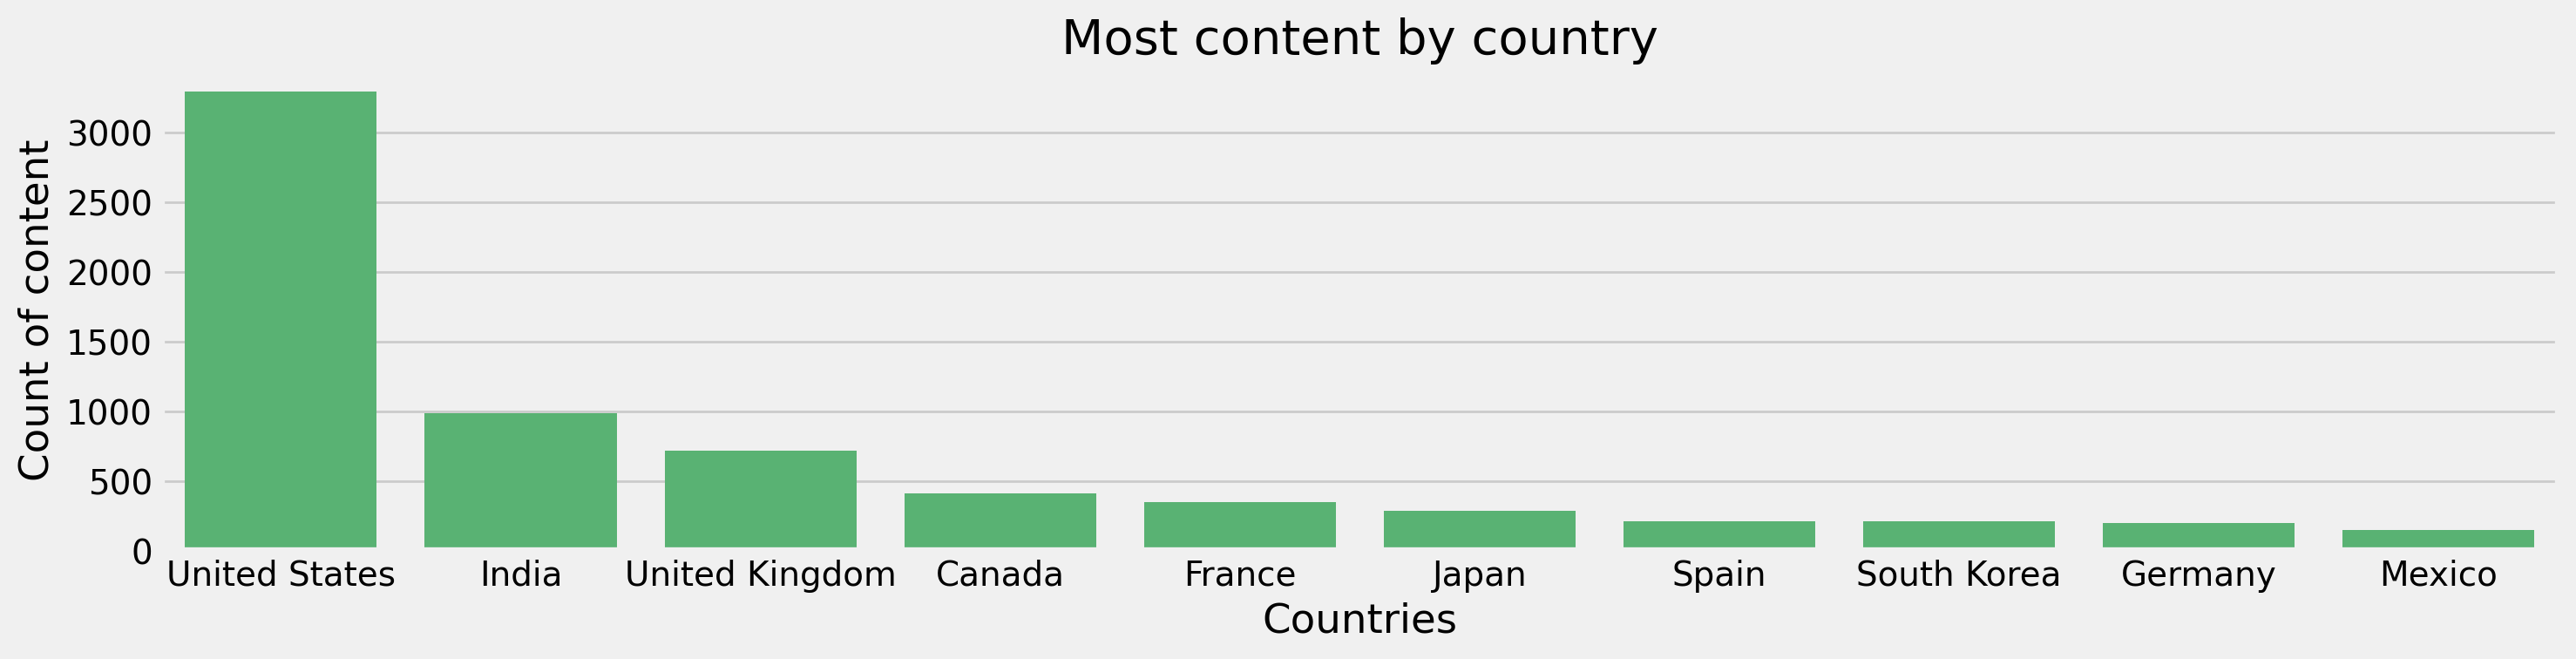

In [27]:
sns.barplot(x='country', y='count', data=country_count_top10, color=green)
plt.title('Most content by country')
plt.xlabel('Countries')
plt.ylabel('Count of content')
plt.tight_layout();

#### Breakdown of the above count on 'Movies' and 'TV Shows'

In [28]:
tracker = {} # Resetting

movies = df.loc[(df['type'] == 'Movie') & (df['country'].notnull())] # All movies where country is non null
tv = df.loc[(df['type'] == 'TV Show') & (df['country'].notnull())]   # All TV shows where country is non null

In [29]:
movies['country'].apply(count_country)

1       None
2       None
3       None
4       None
6       None
        ... 
7780    None
7781    None
7782    None
7783    None
7786    None
Name: country, Length: 5147, dtype: object

In [30]:
tracker # Count of Movies by country

{'Mexico': 101,
 'Singapore': 18,
 'United States': 2430,
 'Egypt': 97,
 'India': 915,
 'Thailand': 43,
 'Nigeria': 68,
 'Norway': 20,
 'Iceland': 7,
 'United Kingdom': 466,
 'South Korea': 55,
 'Italy': 67,
 'Canada': 286,
 'Indonesia': 77,
 'Romania': 12,
 'Spain': 158,
 'Turkey': 80,
 'South Africa': 44,
 'France': 265,
 'Portugal': 4,
 'Hong Kong': 97,
 'China': 102,
 'Germany': 157,
 'Argentina': 64,
 'Serbia': 7,
 'Denmark': 31,
 'Poland': 27,
 'Japan': 103,
 'Kenya': 5,
 'New Zealand': 20,
 'Pakistan': 20,
 'Australia': 84,
 'Taiwan': 15,
 'Netherlands': 37,
 'Philippines': 77,
 'United Arab Emirates': 33,
 'Brazil': 59,
 'Iran': 4,
 'Belgium': 74,
 'Israel': 18,
 'Uruguay': 13,
 'Bulgaria': 9,
 'Chile': 21,
 'Colombia': 17,
 'Algeria': 2,
 'Soviet Union': 3,
 'Sweden': 29,
 'Malaysia': 18,
 'Ireland': 28,
 'Luxembourg': 10,
 'Austria': 10,
 'Peru': 10,
 'Senegal': 2,
 'Switzerland': 16,
 'Ghana': 4,
 'Saudi Arabia': 6,
 'Armenia': 1,
 'Jordan': 7,
 'Mongolia': 1,
 'Namibia': 2,

In [31]:
# Converting the above dictionary into a dataframe (will later add the column for tv shows count)

content_by_country = pd.DataFrame(data=tracker.values(), index=tracker.keys(), columns=['Count']).reset_index()
content_by_country.rename(columns={'index': 'country', 'Count': 'movies'}, inplace=True)

content_by_country

,country,movies
0,Mexico,101
1,Singapore,18
2,United States,2430
3,Egypt,97
4,India,915
...,...,...
109,"United Kingdom,",1
110,Uganda,1
111,East Germany,1
112,Ukraine,1


In [32]:
tracker = {} # Resetting

tv['country'].apply(count_country)

0       None
5       None
11      None
12      None
24      None
        ... 
7766    None
7767    None
7775    None
7779    None
7785    None
Name: country, Length: 2133, dtype: object

In [33]:
tracker # Count of TV shows per country

{'Brazil': 29,
 'Turkey': 28,
 'Poland': 8,
 'United States': 866,
 'Mexico': 53,
 'Japan': 184,
 'South Korea': 157,
 'United Kingdom': 256,
 'India': 75,
 'Canada': 126,
 'Italy': 23,
 'Spain': 57,
 'Australia': 60,
 'Taiwan': 70,
 'China': 45,
 'Germany': 42,
 'France': 84,
 'Singapore': 21,
 'Russia': 17,
 'Mauritius': 1,
 'South Africa': 10,
 'Lebanon': 7,
 'Colombia': 28,
 'Argentina': 18,
 'Philippines': 1,
 'Finland': 4,
 'Netherlands': 8,
 'Chile': 5,
 'Thailand': 22,
 'Nigeria': 8,
 'Saudi Arabia': 4,
 'Syria': 1,
 'Egypt': 13,
 'Kuwait': 3,
 'Belgium': 11,
 'Norway': 9,
 'Sweden': 10,
 'Denmark': 13,
 'Israel': 8,
 'Ireland': 12,
 'Iceland': 2,
 'Indonesia': 3,
 'Malaysia': 8,
 'New Zealand': 8,
 'Czech Republic': 6,
 'Cuba': 1,
 'Austria': 1,
 'Greece': 2,
 'Hong Kong': 5,
 'Pakistan': 4,
 'Luxembourg': 1,
 'Jordan': 1,
 'Uruguay': 1,
 'Azerbaijan': 1,
 'West Germany': 2,
 'Puerto Rico': 1,
 'Malta': 1,
 'Senegal': 1,
 'Ukraine': 2,
 'Switzerland': 1,
 'Belarus': 1,
 'Cypru

In [34]:
# Adding the above dictionary to the content_by_country dataframe for a head-to-head comparison

content_by_country['tv_shows'] = content_by_country['country'].map(tracker)

In [35]:
# For validation purposes, calculating the total count - this should match with the output of cell 26 (which it does)
content_by_country['total_content'] = content_by_country['movies'] + content_by_country['tv_shows']


top_content = content_by_country.sort_values('total_content', ascending=False).head(10)
top_content

,country,movies,tv_shows,total_content
2,United States,2430,866.0,3296.0
4,India,915,75.0,990.0
9,United Kingdom,466,256.0,722.0
12,Canada,286,126.0,412.0
18,France,265,84.0,349.0
27,Japan,103,184.0,287.0
15,Spain,158,57.0,215.0
10,South Korea,55,157.0,212.0
22,Germany,157,42.0,199.0
0,Mexico,101,53.0,154.0


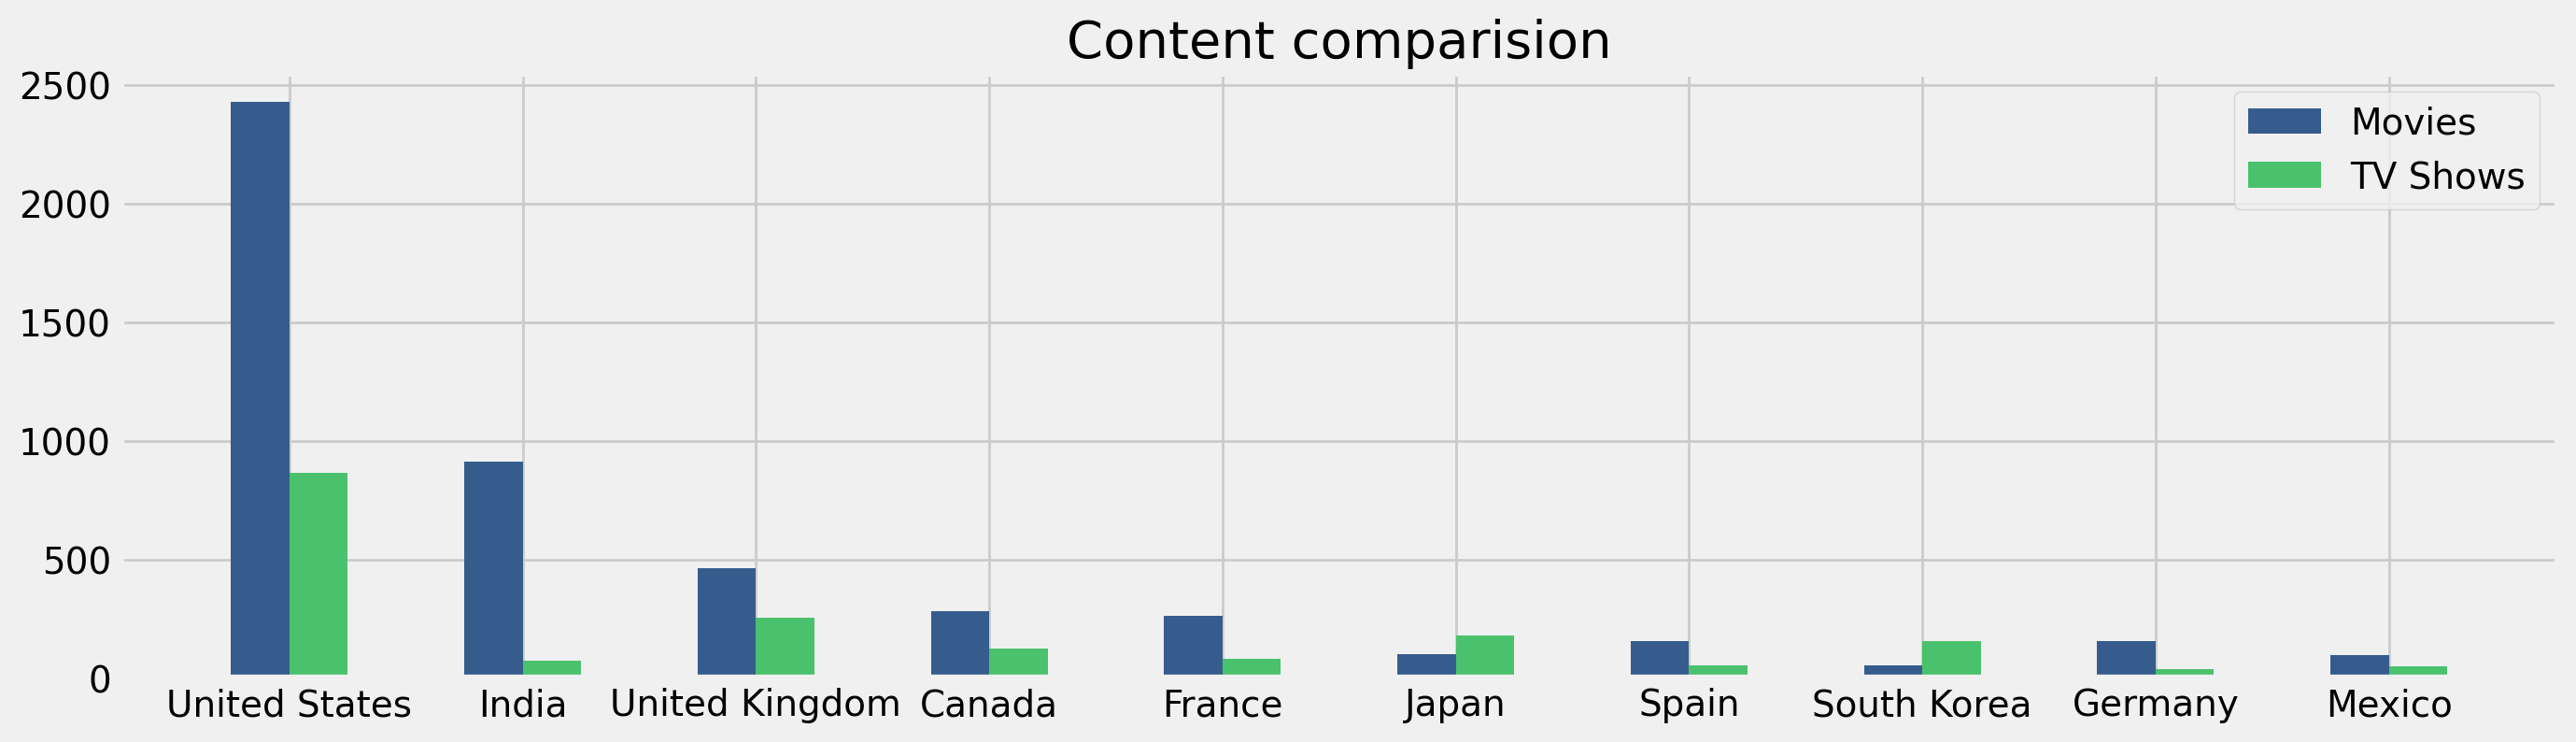

In [36]:
# Visualizing the content per country based on the type of content

x_ticks = np.arange(0,10,1)
width=0.25

plt.bar(x_ticks-width, top_content['movies'], label='Movies', width=width, color=blue)
plt.bar(x_ticks, top_content['tv_shows'], label='TV Shows', width=width, color=green)

plt.xticks(ticks=x_ticks-(width/2), labels=top_content.country)
plt.title('Content comparision')

plt.legend();


### Distribution of duration for Movies and TV Shows

In [37]:
movies = df.loc[df['type'] == 'Movie'] # All records with type 'movies'

In [38]:
len(movies) # Total records 

5377

In [39]:
movies['duration'].str.contains('min').sum() # All records have time in 'mins'

5377

In [40]:
movies['duration'] = pd.to_numeric(movies['duration'].str.replace(' min', '')) # removing the string 'mins'
#and converting to int type

<ipython-input-40-95c13802357d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = pd.to_numeric(movies['duration'].str.replace(' min', '')) # removing the string 'mins'


In [41]:
movies.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0


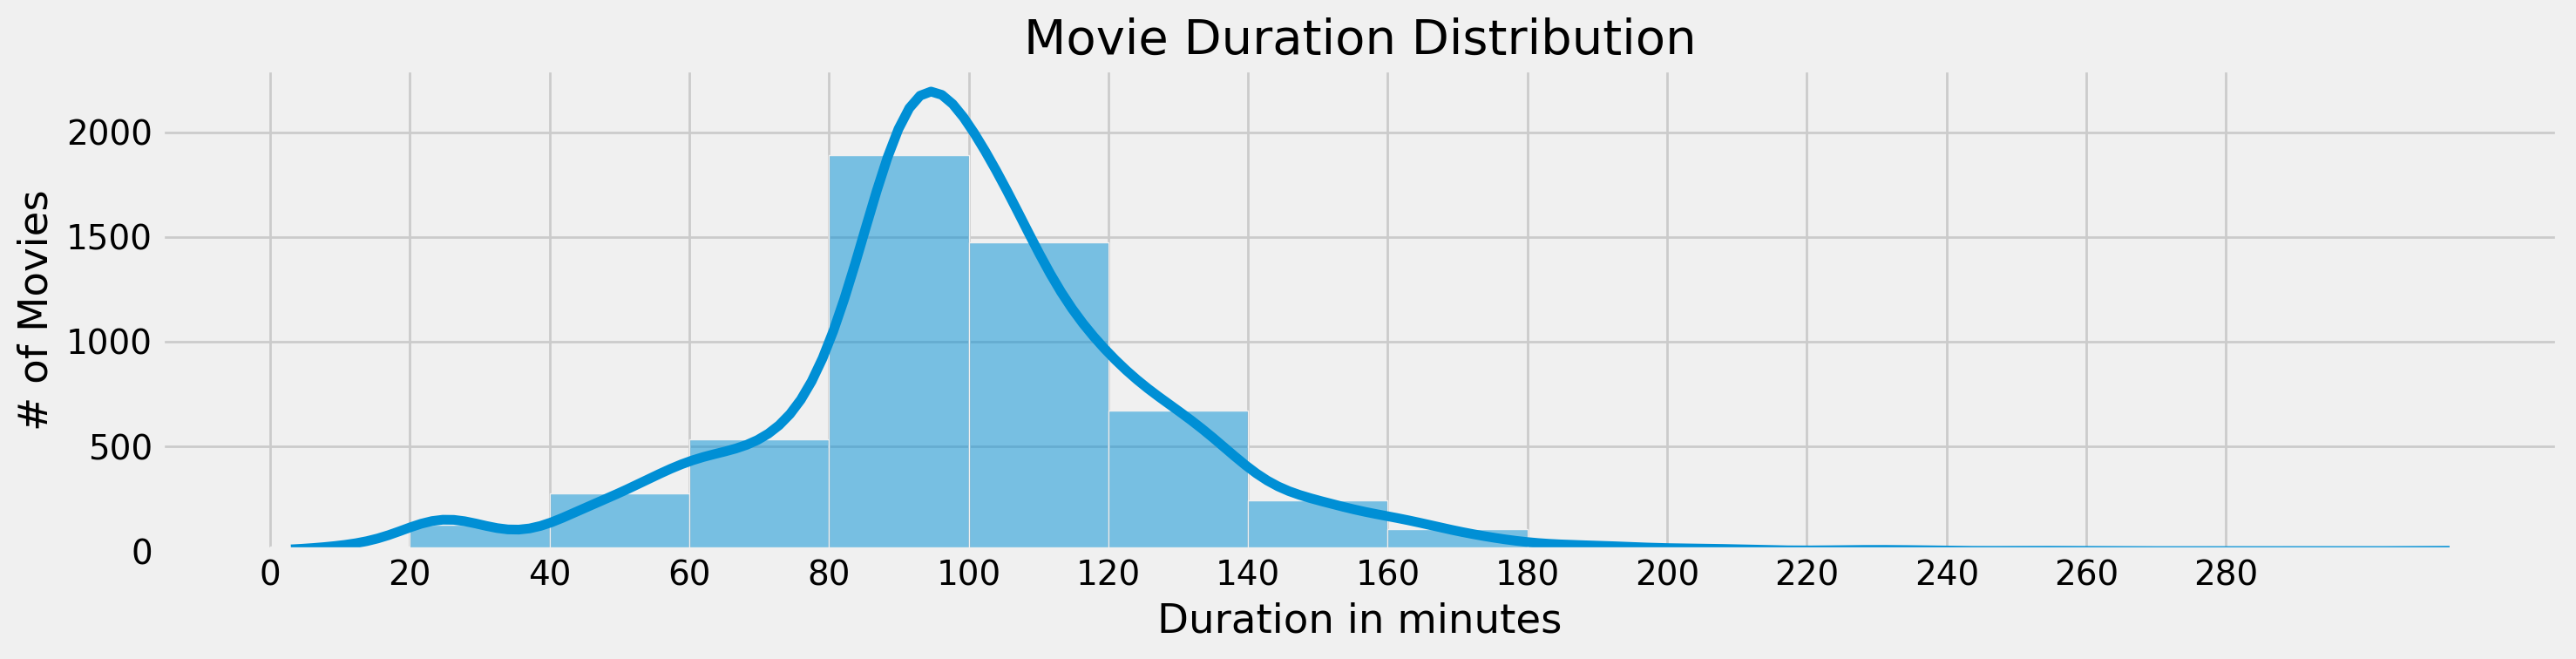

In [42]:
sns.histplot(data=movies, x='duration', bins=np.arange(0,300,20), kde=True)
plt.xticks(ticks=np.arange(0,300,20))
plt.title('Movie Duration Distribution')
plt.ylabel('# of Movies')
plt.xlabel('Duration in minutes')
plt.tight_layout();

In [43]:
tv_shows = df.loc[df['type'] == 'TV Show'] # All records with type 'TV Show'

In [44]:
len(tv_shows['duration']) # Total records with type 'TV Show'

2410

In [45]:
tv_shows['duration'].str.contains('Season').sum() # Duration for all TV Shows is measured in Seasons

2410

In [46]:
tv_shows['duration'].value_counts()

1 Season      1608
2 Seasons      382
3 Seasons      184
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       6
11 Seasons       3
12 Seasons       2
15 Seasons       2
13 Seasons       2
16 Seasons       1
Name: duration, dtype: int64

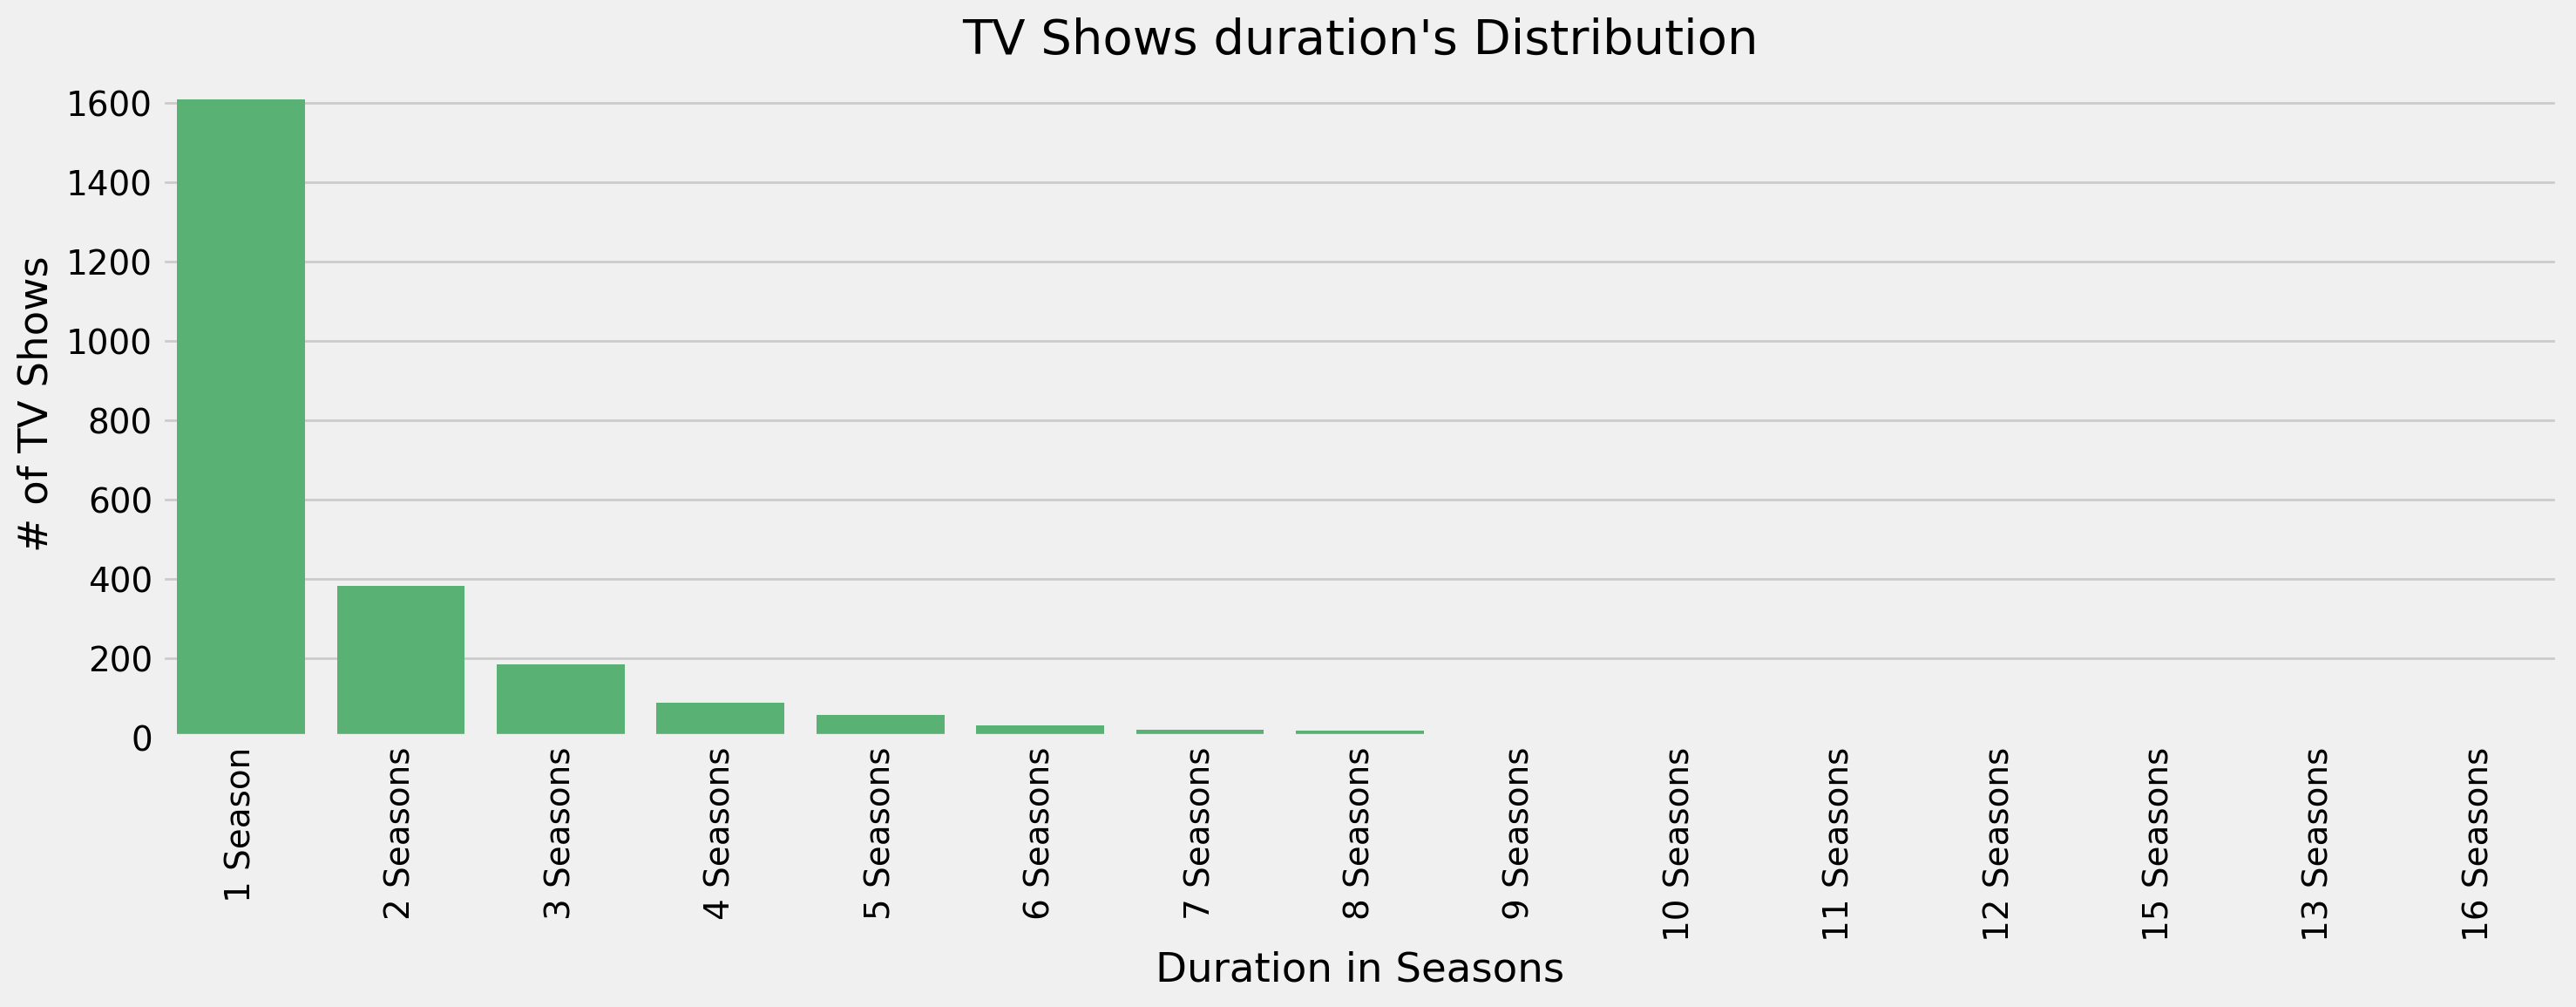

In [47]:
plt.figure(figsize=(15,6), dpi=200)

sns.countplot(data=tv_shows, x='duration', order=tv_shows['duration'].value_counts().index, color=green);
plt.xticks(rotation=90);

plt.title("TV Shows duration's Distribution")
plt.ylabel('# of TV Shows')
plt.xlabel('Duration in Seasons')
plt.tight_layout();

### Trends of TV Shows and Movies added in past 5 years

In [48]:
df['year_added'].value_counts().sort_index(ascending=False)

2021.0     117
2020.0    2009
2019.0    2153
2018.0    1685
2017.0    1225
2016.0     443
2015.0      88
2014.0      25
2013.0      11
2012.0       3
2011.0      13
2010.0       1
2009.0       2
2008.0       2
Name: year_added, dtype: int64

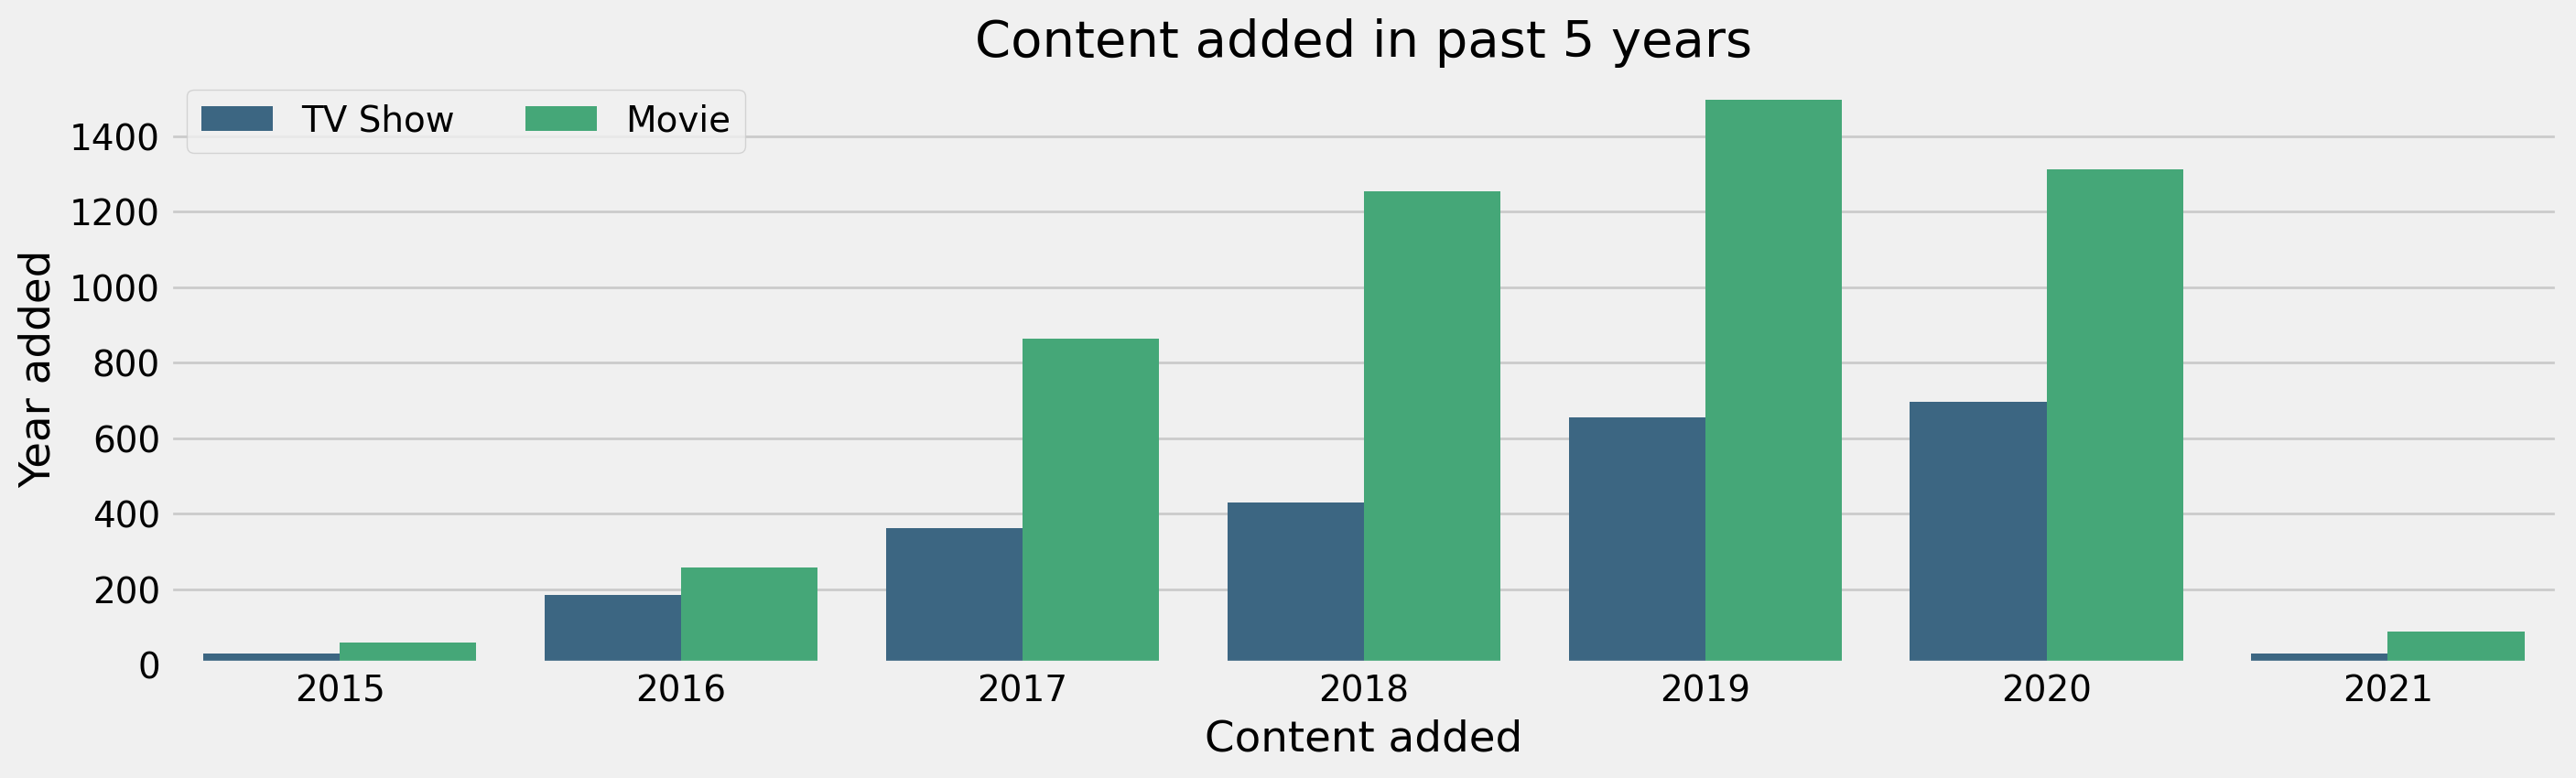

In [49]:
past_10_years = df.loc[df['year_added'] >= 2015]

ticks = sorted(list(past_10_years['year_added'].value_counts().index))
labels = [int(tick) for tick in ticks]

sns.countplot(data=past_10_years, x='year_added', hue='type', palette='viridis')
plt.xticks(ticks=np.arange(0,7,1), labels=labels)
plt.xlabel('Content added')
plt.ylabel('Year added')
plt.legend(loc=("upper left"), ncol=2)
plt.title('Content added in past 5 years');


### Analyzing the 'Rating' field

In [50]:
ratings = df.loc[df['rating'].notnull()]
ratings.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0


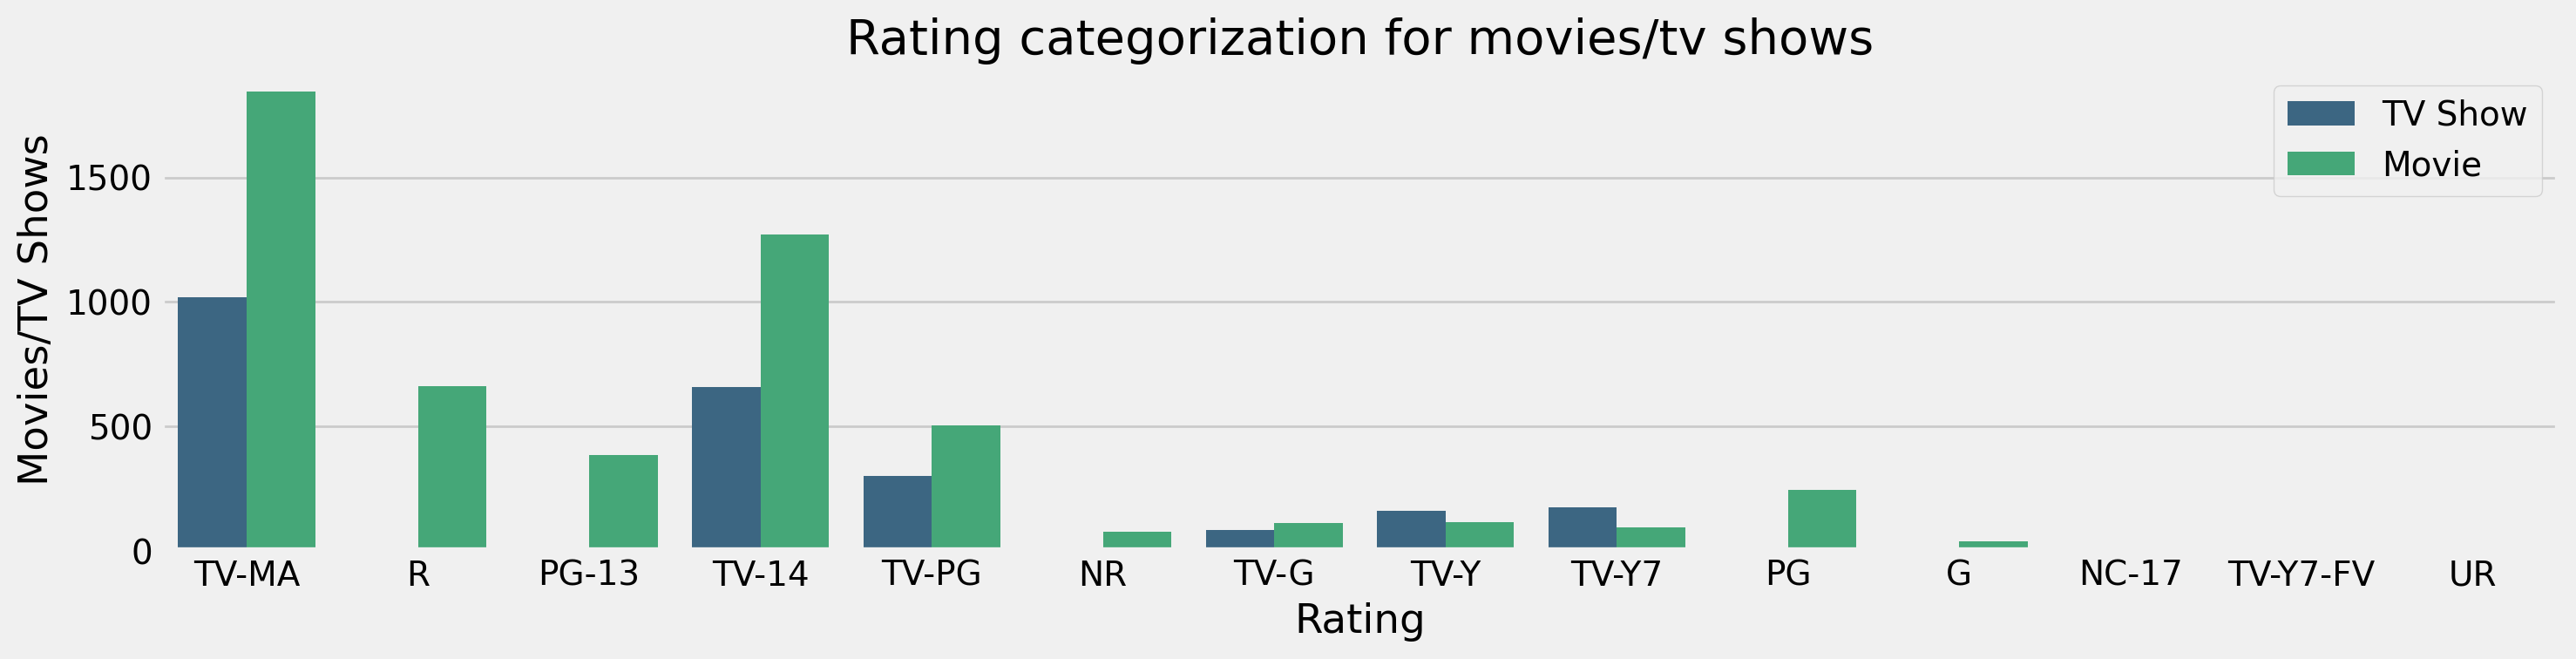

In [51]:
sns.countplot(data=ratings, x='rating', hue='type', palette='viridis')
plt.legend(loc='upper right')
plt.title('Rating categorization for movies/tv shows')
plt.xlabel('Rating')
plt.ylabel('Movies/TV Shows')
plt.tight_layout();

### Most popular genre in Movies and TV Shows

In [52]:
movies.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0


In [53]:
genre_bucket = {}

def count_genres(genres):
    genres_list = genres.split(', ')
    
    for genre in genres_list:
        if genre in genre_bucket:
            genre_bucket[genre] += 1
        else:
            genre_bucket[genre] = 1


In [54]:
movies['listed_in'].apply(count_genres)

1       None
2       None
3       None
4       None
6       None
        ... 
7781    None
7782    None
7783    None
7784    None
7786    None
Name: listed_in, Length: 5377, dtype: object

In [55]:
genre_bucket

{'Dramas': 2106,
 'International Movies': 2437,
 'Horror Movies': 312,
 'Action & Adventure': 721,
 'Independent Movies': 673,
 'Sci-Fi & Fantasy': 218,
 'Thrillers': 491,
 'Documentaries': 786,
 'Sports Movies': 196,
 'Comedies': 1471,
 'Romantic Movies': 531,
 'Movies': 56,
 'Music & Musicals': 321,
 'LGBTQ Movies': 90,
 'Faith & Spirituality': 57,
 'Children & Family Movies': 532,
 'Classic Movies': 103,
 'Cult Movies': 59,
 'Stand-Up Comedy': 329,
 'Anime Features': 57}

In [56]:
most_popular_movie_genres = pd.DataFrame(genre_bucket.values(), index=genre_bucket.keys(), columns=['count'])
most_popular_movie_genres = most_popular_movie_genres.reset_index()

most_popular_movie_genres.rename(columns={'index': 'genre'}, inplace=True)

In [57]:
most_popular_movie_genres = most_popular_movie_genres.sort_values('count', ascending=False)
most_popular_movie_genres.head()

,genre,count
1,International Movies,2437
0,Dramas,2106
9,Comedies,1471
7,Documentaries,786
3,Action & Adventure,721


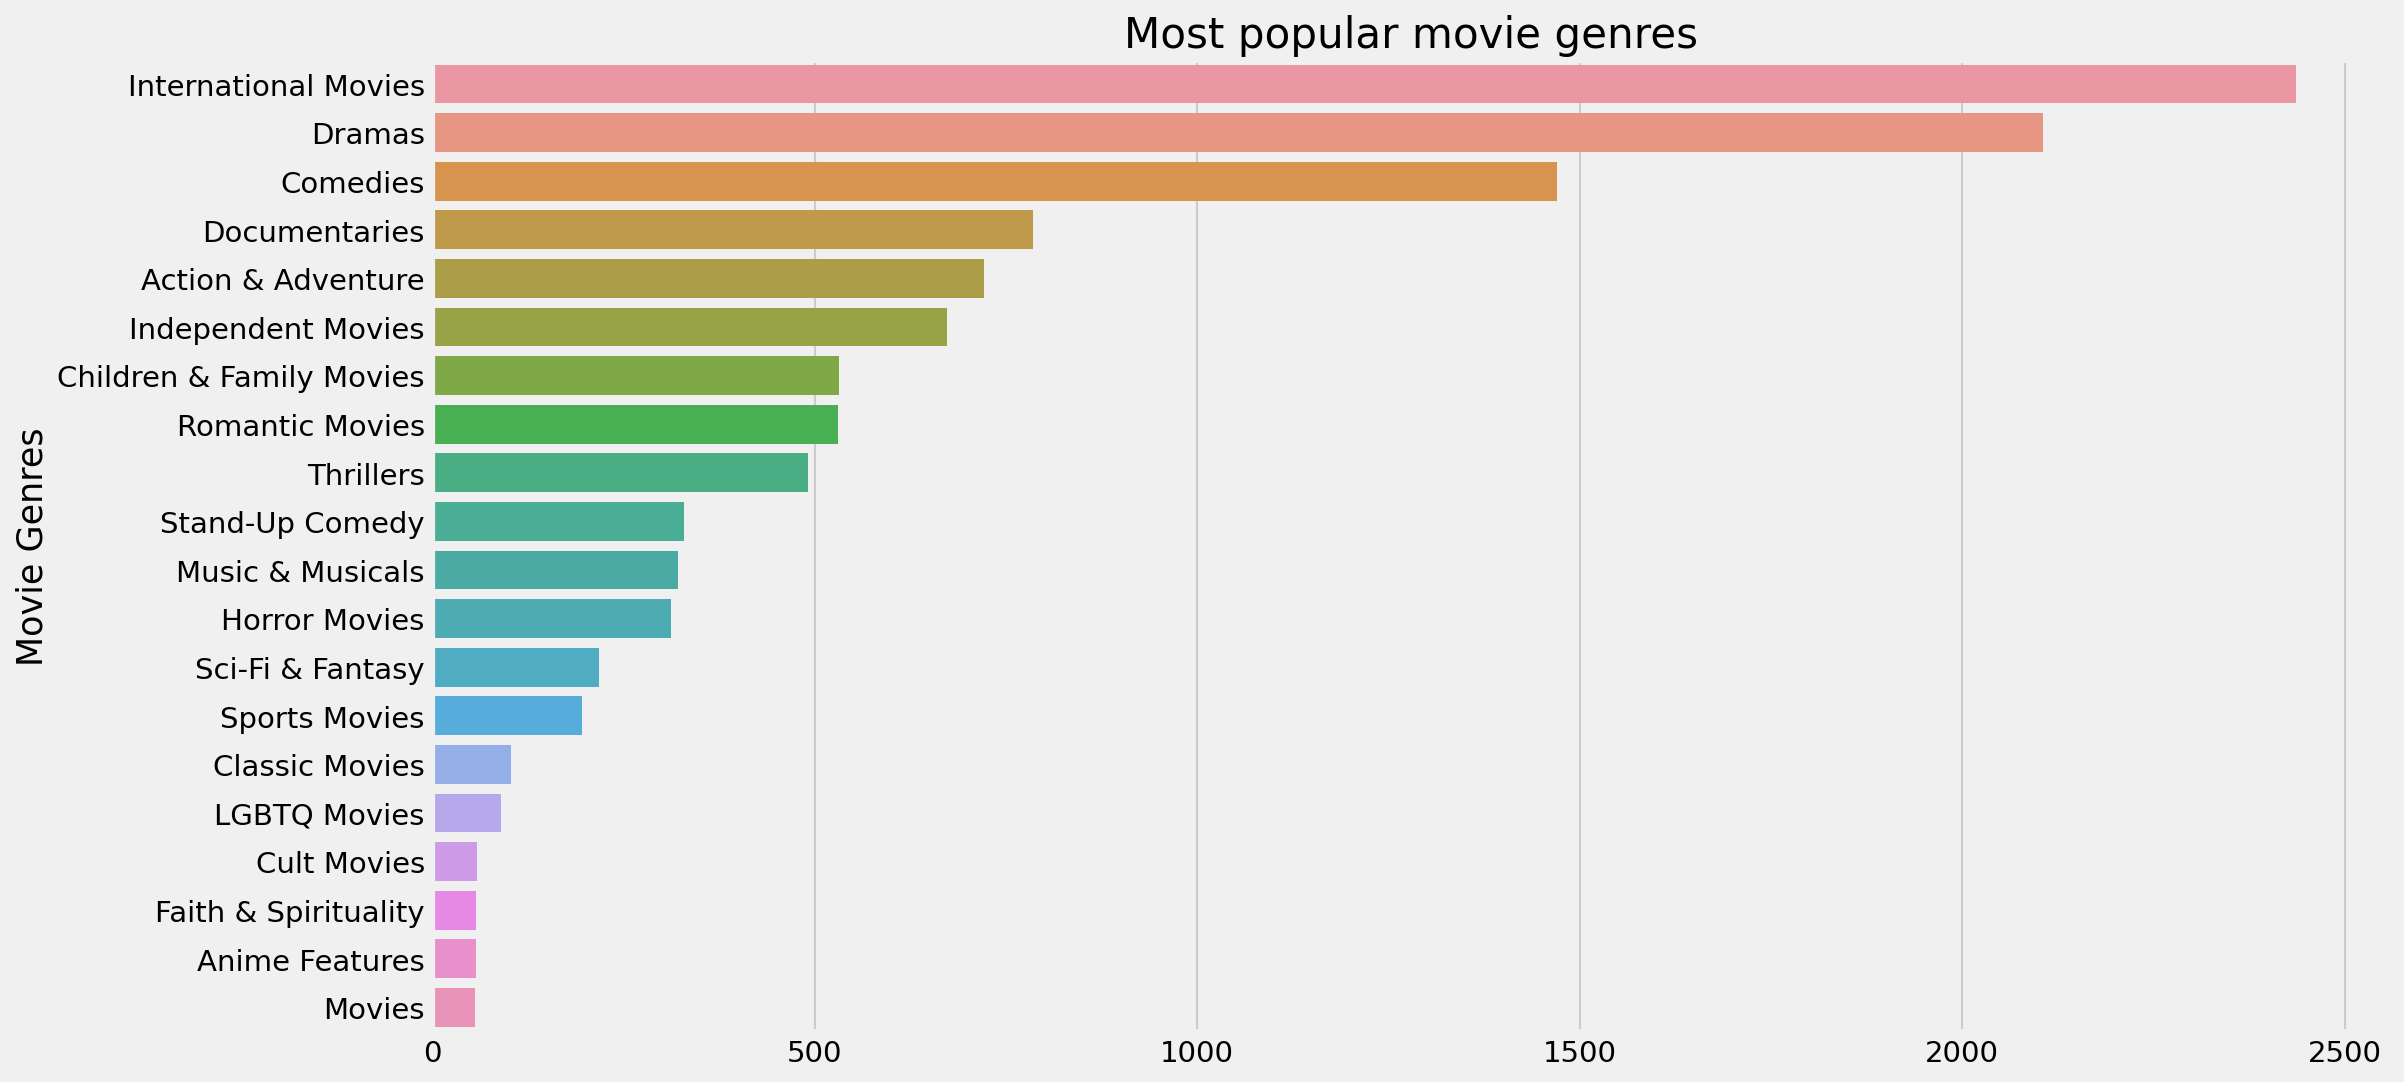

In [58]:
plt.figure(figsize=(15,8), dpi=150)
sns.barplot(data=most_popular_movie_genres, y='genre', x='count')
plt.title('Most popular movie genres')
plt.ylabel('Movie Genres')
plt.xlabel('');

In [59]:
tv_shows.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017.0,7.0


In [65]:
genre_bucket = {} # Resetting

In [66]:
tv_shows['listed_in'].apply(count_genres)

0       None
5       None
11      None
12      None
16      None
        ... 
7767    None
7775    None
7777    None
7779    None
7785    None
Name: listed_in, Length: 2410, dtype: object

In [67]:
genre_bucket

{'International TV Shows': 1199,
 'TV Dramas': 704,
 'TV Sci-Fi & Fantasy': 76,
 'TV Mysteries': 90,
 'Crime TV Shows': 427,
 'Docuseries': 353,
 'Anime Series': 148,
 'Reality TV': 222,
 'TV Comedies': 525,
 'Romantic TV Shows': 333,
 'Science & Nature TV': 85,
 'British TV Shows': 232,
 'Korean TV Shows': 150,
 "Kids' TV": 414,
 'TV Action & Adventure': 150,
 'Spanish-Language TV Shows': 147,
 'TV Shows': 12,
 'TV Horror': 69,
 'Stand-Up Comedy & Talk Shows': 52,
 'Teen TV Shows': 60,
 'TV Thrillers': 50,
 'Classic & Cult TV': 27}

In [70]:
most_popular_tv_genres = pd.DataFrame(genre_bucket.values(), index=genre_bucket.keys(), columns=['count'])
most_popular_tv_genres = most_popular_tv_genres.reset_index()

most_popular_tv_genres.rename(columns={'index': 'genre'}, inplace=True)

In [71]:
most_popular_tv_genres = most_popular_tv_genres.sort_values('count', ascending=False)
most_popular_tv_genres.head()

,genre,count
0,International TV Shows,1199
1,TV Dramas,704
8,TV Comedies,525
4,Crime TV Shows,427
13,Kids' TV,414


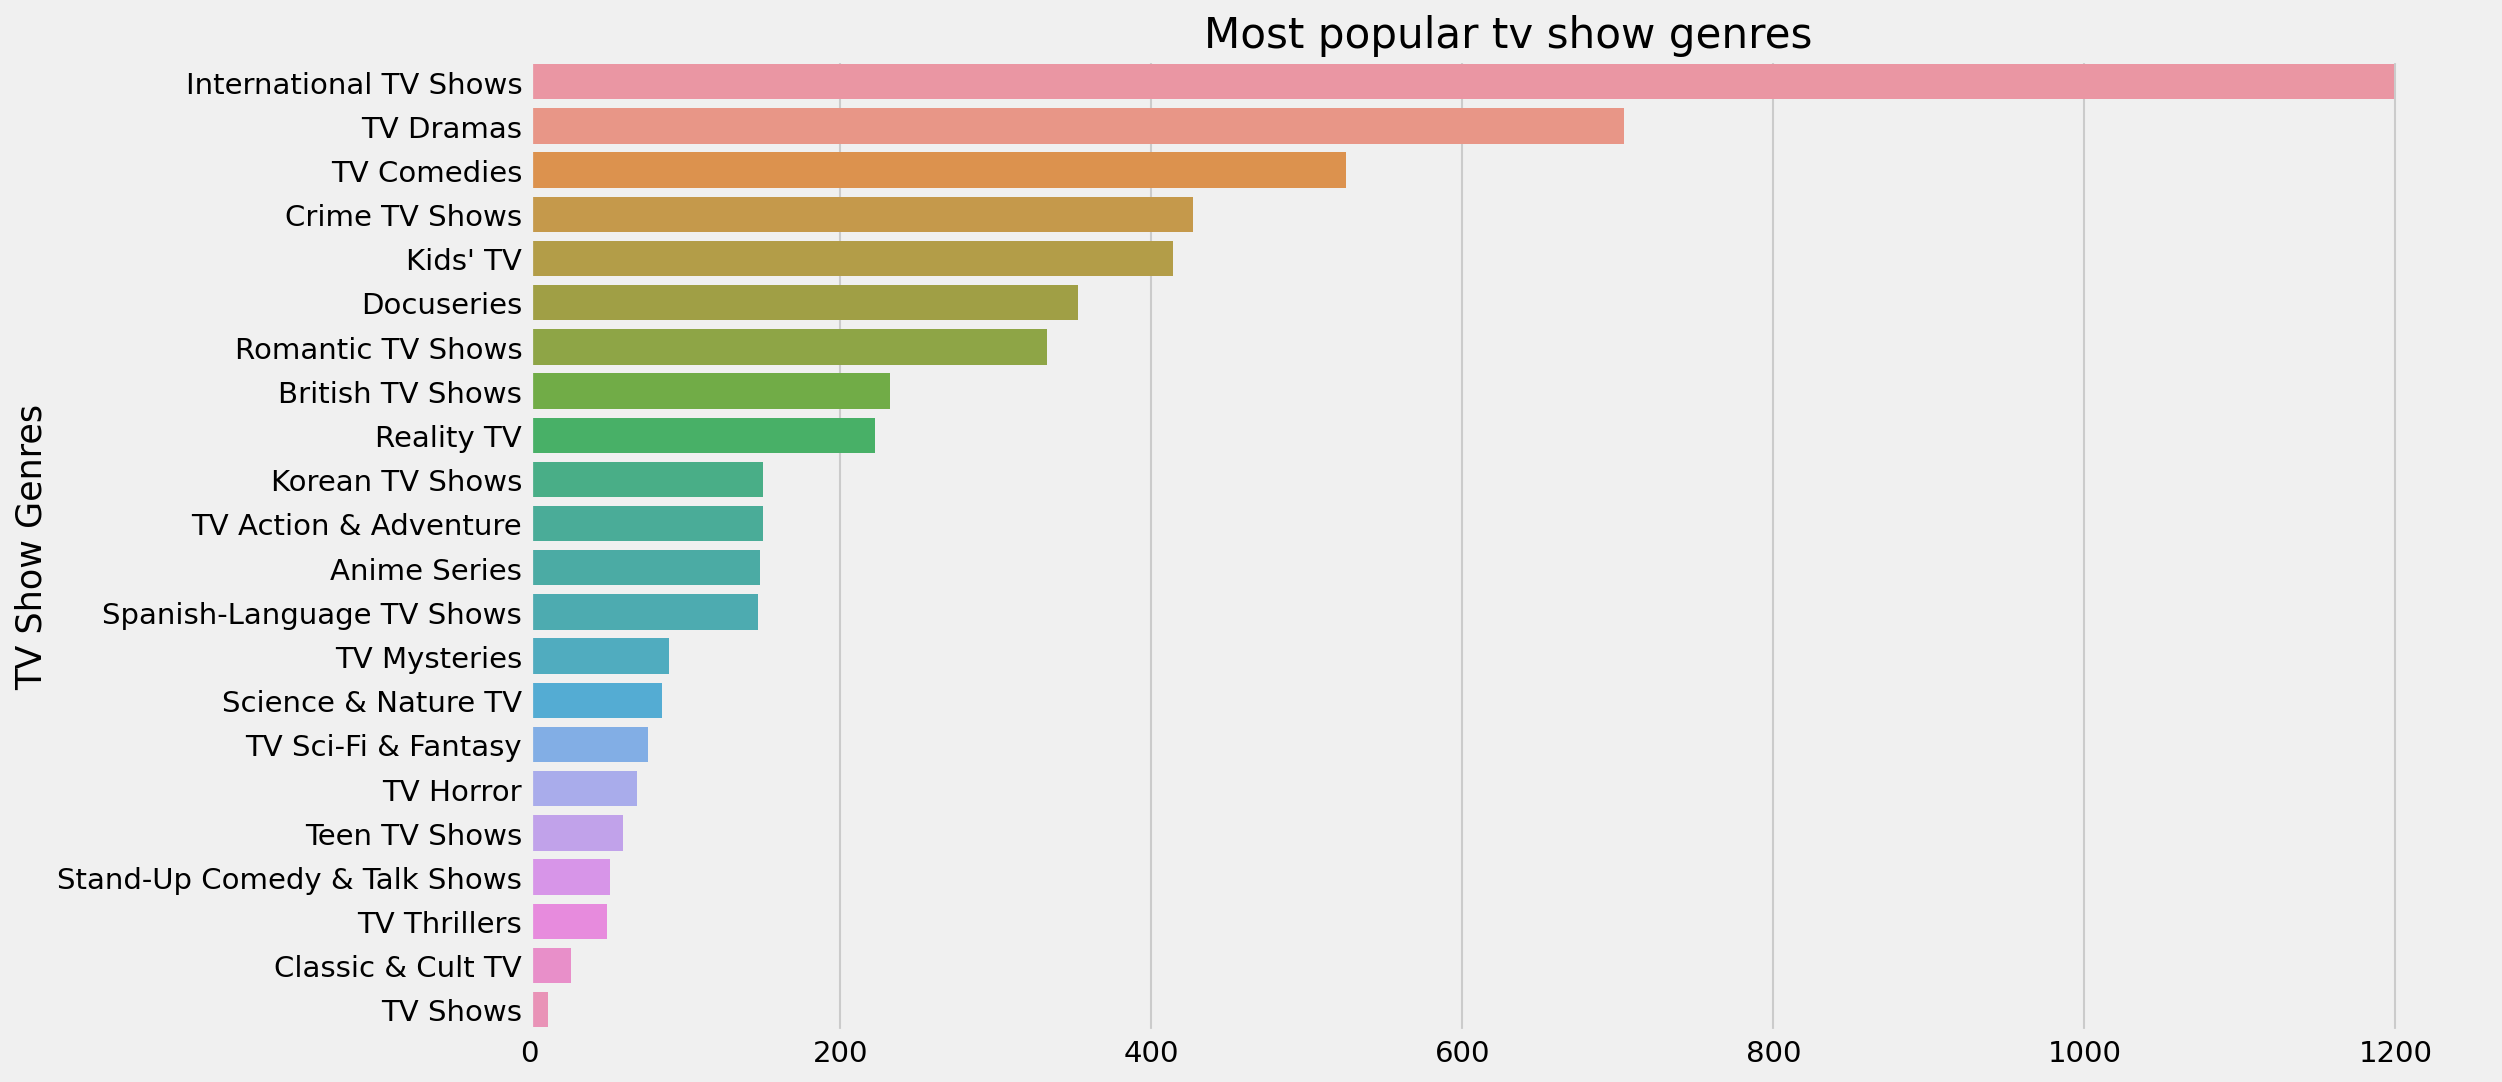

In [72]:
plt.figure(figsize=(15,8), dpi=150)
sns.barplot(data=most_popular_tv_genres, y='genre', x='count')
plt.title('Most popular tv show genres')
plt.ylabel('TV Show Genres')
plt.xlabel('');